In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sb
from datetime import time
import os
import pandas as pd
from scipy.signal import savgol_filter

# data_lists = [created_apps, total_transaction_amount, total_sender_number, total_receiver_number, total_active_accounts, mean_transaction_amount_per_sender,
# mean_transaction_amount_per_receiver, mean_amount_of_unique_receiver_for_sender, mean_amount_of_unique_sender_for_receiver, only_sender_accounts,
# only_receiver_accounts, percent_of_senders_only_senders, percent_of_receivers_only_receivers, percent_of_accounts_only_senders, percent_of_accounts_only_receivers,
# sender_average_transacted_accounts, receiver_average_transacted_accounts,sender_average_transacted_with_same_accounts, receiver_average_transacted_with_same_accounts,
# most_frequent_ids, percentage_of_total_transactions_per_asset, unique_senders_per_asset, unique_receivers_per_asset, unique_accounts_per_asset,
# percentage_of_total_accounts_per_asset, transactions_one_algo, involved_accounts_per_type, involved_senders_per_type, involved_receivers_per_type,
# percentage_of_total_accounts_per_type, transaction_amount_in_microalgo, closing_transactions_count, more_than_one_algo,
# more_than_one_algo_percentage, mean_amount_of_algo_sent, percentage_of_all_transactions_per_type, transaction_type_percentages_of_total_transactions,total_activity]

# transaction_type_list = ['pay', 'axfer', 'appl','acfg','keyreg', 'afrz']

#Diferencia de 10 dias cada 200.000 bloques

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\filtering_algorithm\periodo2_lists\periodo2_data_lists_smoothed', 'rb') as fp:
    created_apps, total_transaction_amount, total_sender_number, total_receiver_number, total_active_accounts, mean_transaction_amount_per_sender,mean_transaction_amount_per_receiver, mean_amount_of_unique_receiver_for_sender, mean_amount_of_unique_sender_for_receiver, only_sender_accounts,only_receiver_accounts, percent_of_senders_only_senders, percent_of_receivers_only_receivers, percent_of_accounts_only_senders, percent_of_accounts_only_receivers,sender_average_transacted_accounts, receiver_average_transacted_accounts,sender_average_transacted_with_same_accounts, receiver_average_transacted_with_same_accounts,most_frequent_ids, percentage_of_total_transactions_per_asset, unique_senders_per_asset, unique_receivers_per_asset, unique_accounts_per_asset,percentage_of_total_accounts_per_asset, transactions_one_algo, involved_accounts_per_type, involved_senders_per_type, involved_receivers_per_type,percentage_of_total_accounts_per_type, transaction_amount_in_microalgo, closing_transactions_count, more_than_one_algo,more_than_one_algo_percentage, mean_amount_of_algo_sent, percentage_of_all_transactions_per_type, transaction_type_percentages_of_total_transactions, total_activity = pickle.load(fp)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\filtering_algorithm\periodo2_lists\periodo2_filtered_percentage_of_total_transactions', 'rb') as f:
    filtered_total_transaction_percentage = pickle.load(f)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\filtering_algorithm\periodo2_lists\periodo2_dates', 'rb') as file:
    chunk_dates = pickle.load(file)

#temp dates porque no funciona bien
# chunk_dates = list(range(0,len(filtered_total_transaction_percentage),1))
print(len(chunk_dates))
plt.rc('figure', figsize= (15,7))
plt.style.use('dark_background')
ncolors = len(plt.rcParams['axes.prop_cycle'])

53


(1.0, 8.0)

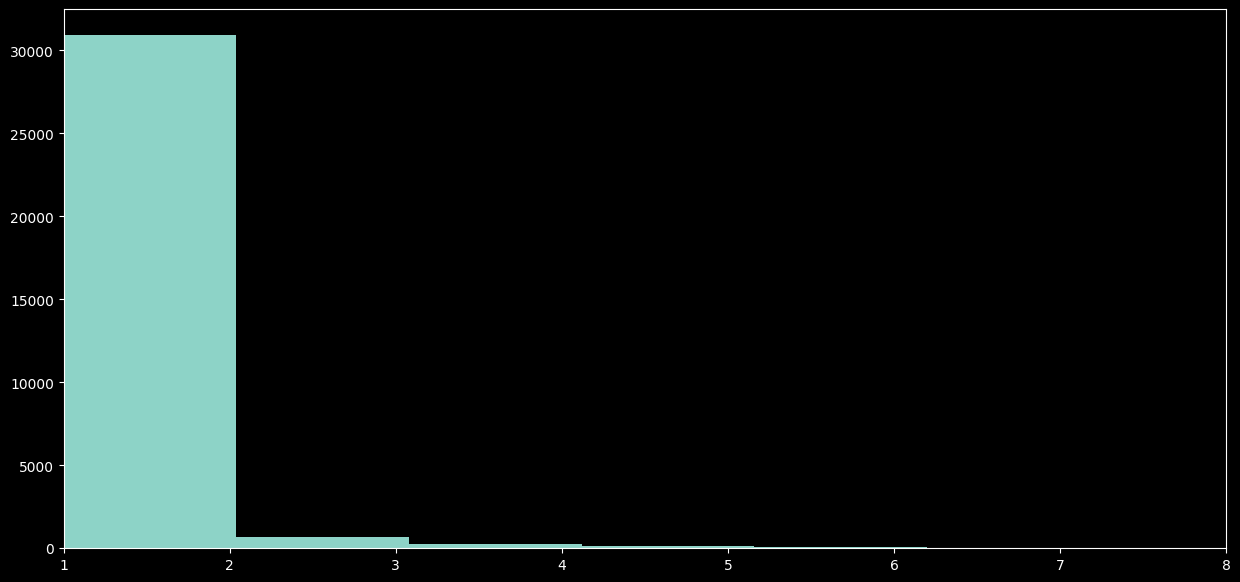

In [38]:
plt.hist(total_activity, bins=50)
plt.xlim(1,8)

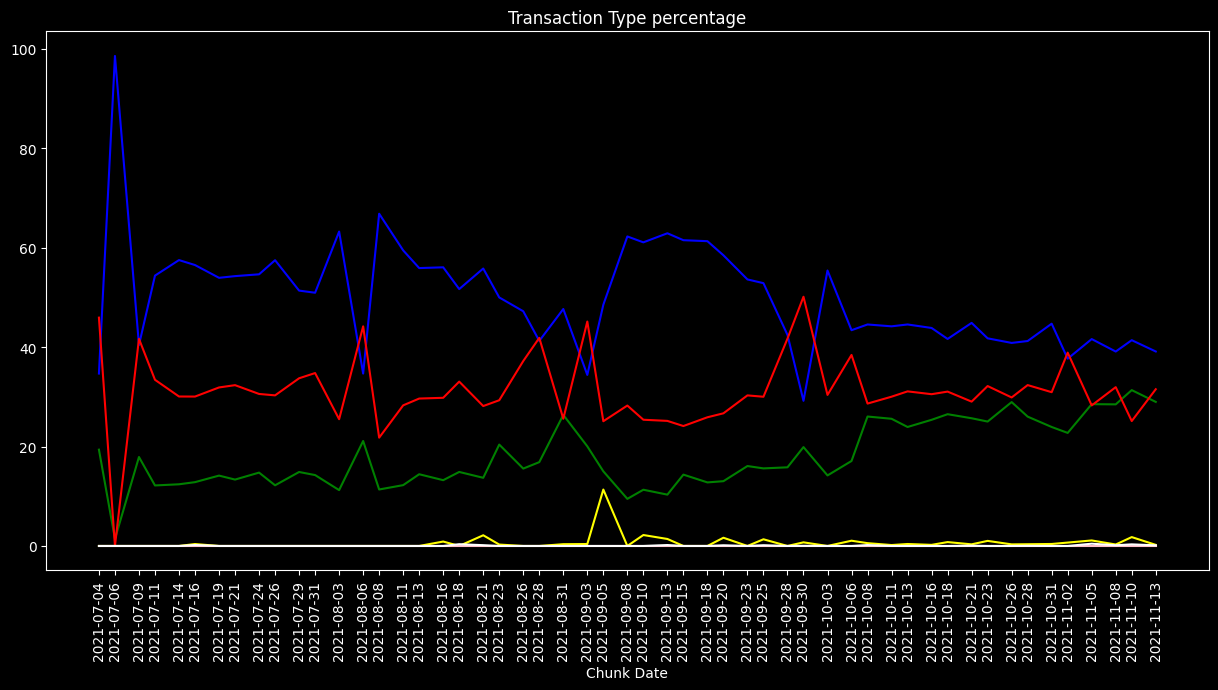

In [4]:
pay_percentage = transaction_type_percentages_of_total_transactions[0]
axfer_percentage = transaction_type_percentages_of_total_transactions[1]
appl_percentage = transaction_type_percentages_of_total_transactions[2]
acfg_percentage = transaction_type_percentages_of_total_transactions[3]
keyreg_percentage = transaction_type_percentages_of_total_transactions[4]
afrz_percentage = transaction_type_percentages_of_total_transactions[5]

# plt.plot(chunk_dates, created_apps, color = 'blz'
sb.lineplot(x = chunk_dates, y = pay_percentage, color = 'blue')
sb.lineplot(x = chunk_dates, y = axfer_percentage, color = 'green')
sb.lineplot(x = chunk_dates, y = appl_percentage, color = 'red')
sb.lineplot(x = chunk_dates, y = acfg_percentage, color = 'yellow')
sb.lineplot(x = chunk_dates, y = keyreg_percentage, color = 'pink')
sb.lineplot(x = chunk_dates, y = afrz_percentage, color = 'white')

plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.xlabel('Chunk Date')
plt.title('Transaction Type percentage')
plt.show()


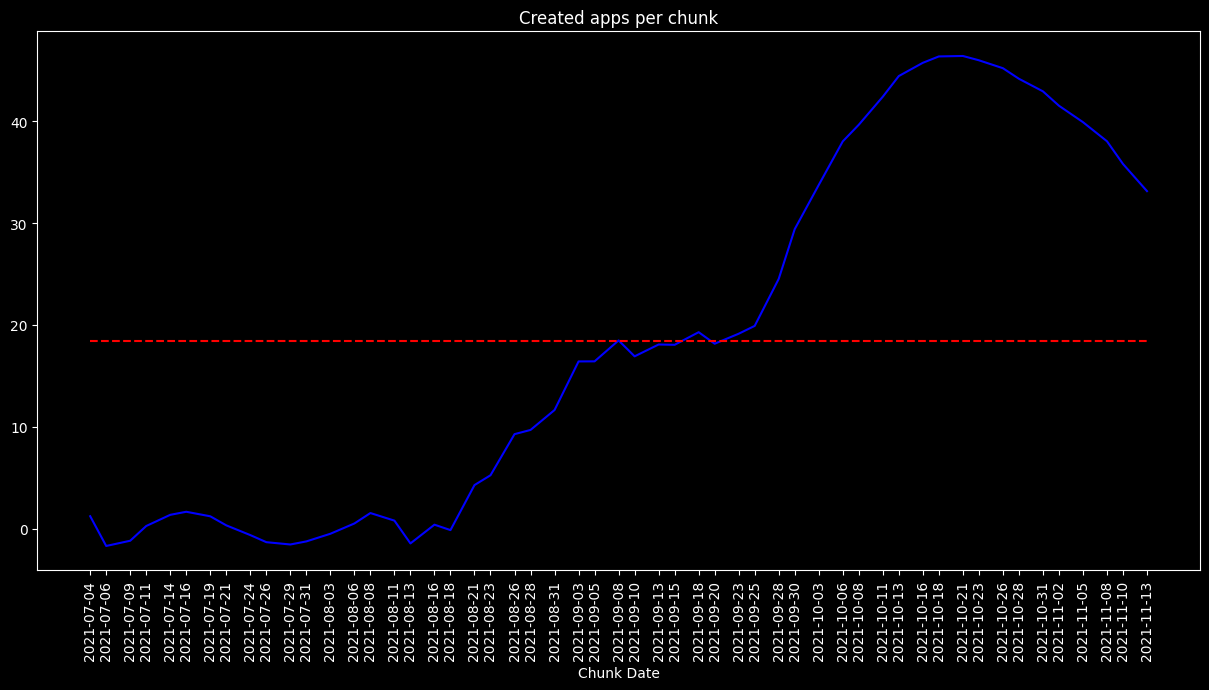

In [5]:
# plt.plot(chunk_dates, created_apps, color = 'blz'
sb.lineplot(x = chunk_dates, y = created_apps, color = 'blue')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(created_apps))*np.ones(len(created_apps)), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.xlabel('Chunk Date')
plt.title('Created apps per chunk')
plt.show()


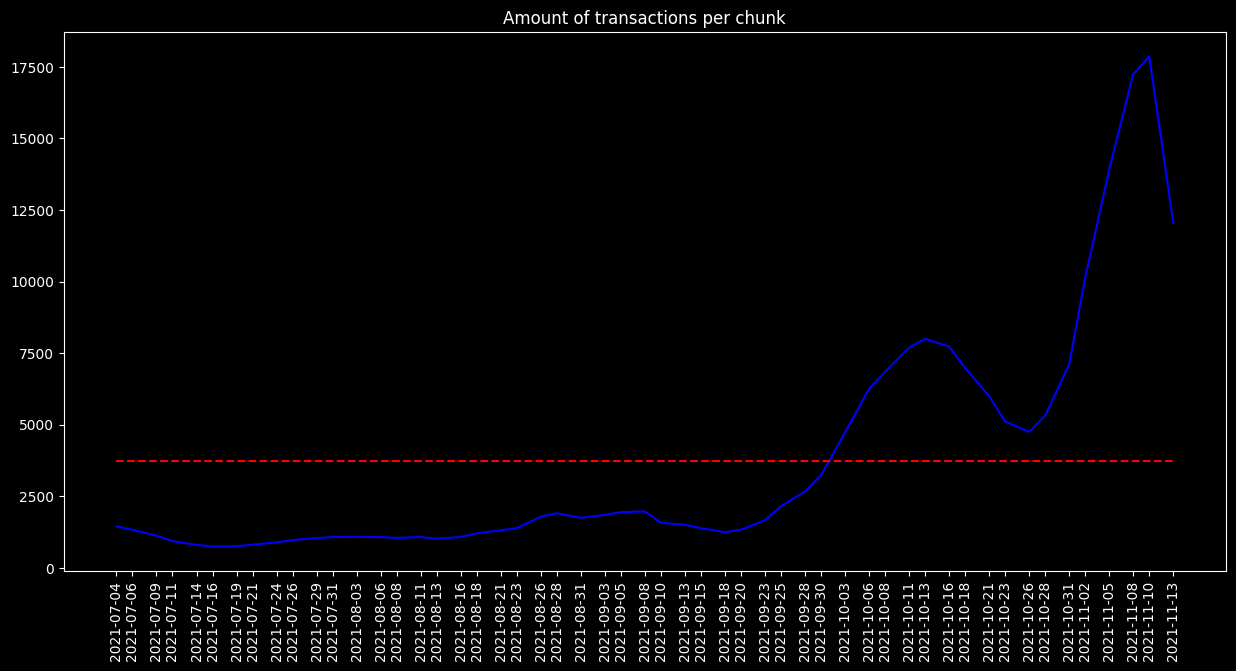

In [6]:
sb.lineplot(x = chunk_dates, y = np.array(total_transaction_amount), color = 'blue')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(total_transaction_amount))*np.ones(len(total_transaction_amount)), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Amount of transactions per chunk')
plt.show()

Text(0.5, 1.0, 'Total amount of senders per chunk')

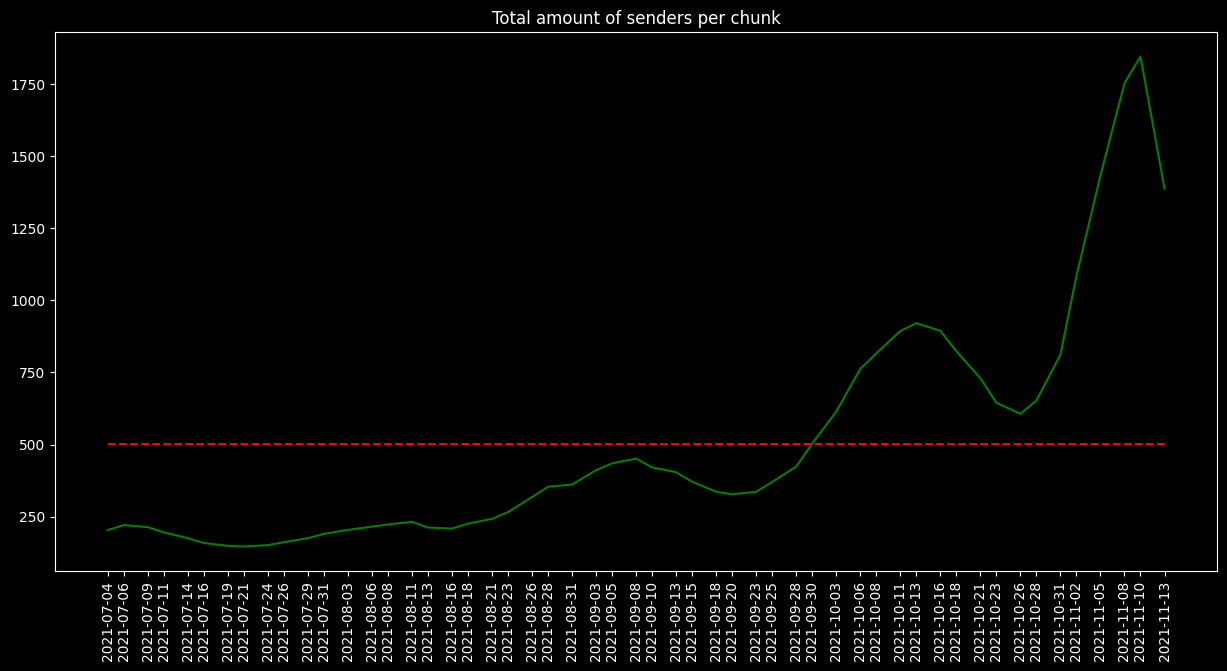

In [7]:
sb.lineplot(x = chunk_dates, y = np.array(total_sender_number), color = 'green')
sb.lineplot(x =chunk_dates, y = np.mean(np.array(total_sender_number))*np.ones(len(total_sender_number)), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Total amount of senders per chunk')

Text(0.5, 1.0, 'Total amount of receivers per chunk')

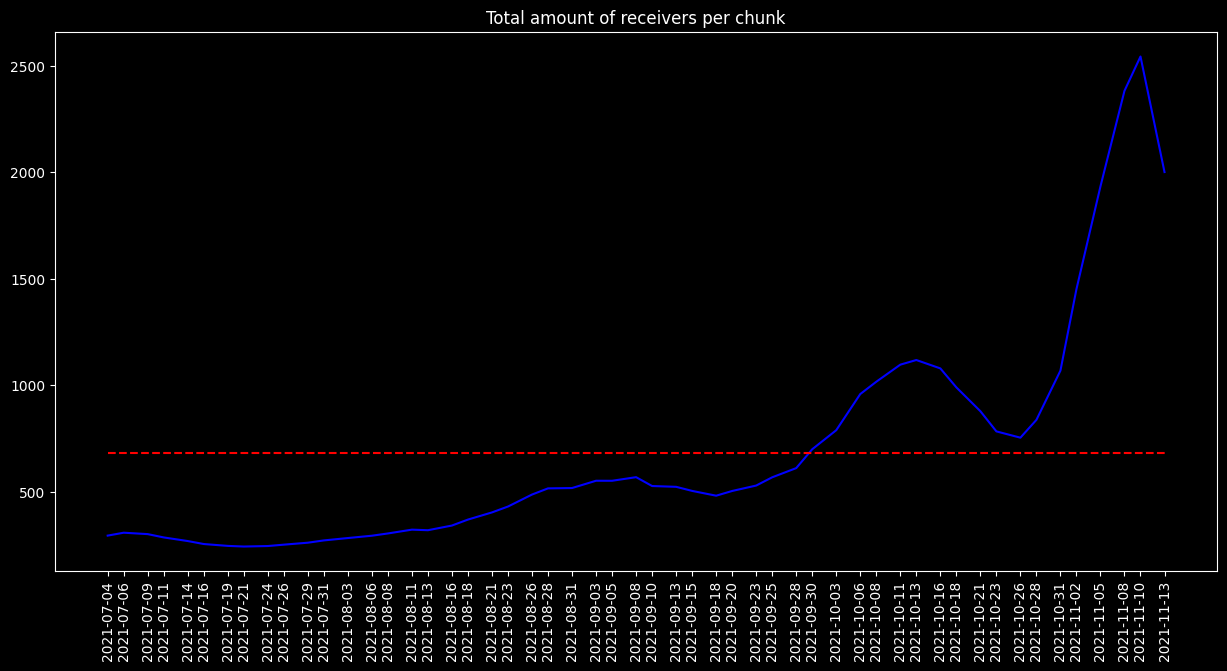

In [8]:
sb.lineplot(x = chunk_dates, y = np.array(total_receiver_number), color = 'blue')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(total_receiver_number))*np.ones(len(total_receiver_number)), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Total amount of receivers per chunk')

Text(0.5, 1.0, 'Total active accounts per chunk')

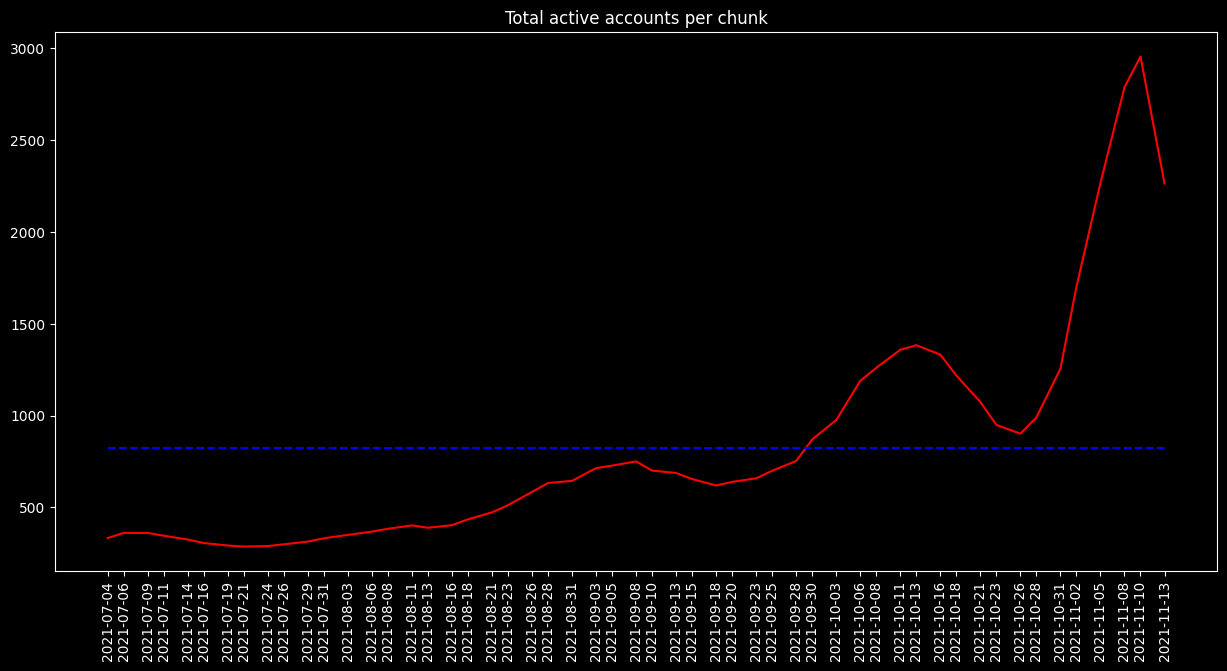

In [9]:
sb.lineplot(x = chunk_dates, y = np.array(total_active_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(total_active_accounts))*np.ones(len(total_active_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Total active accounts per chunk')

Text(0.5, 1.0, 'Mean transaction amount per sender per chunk')

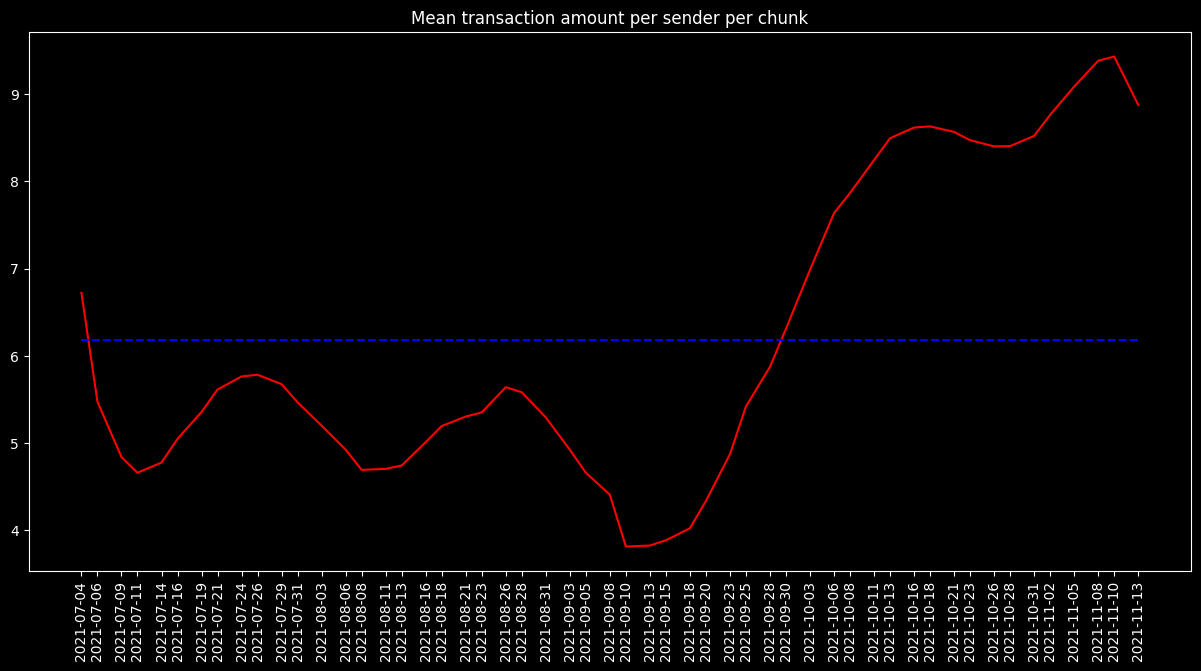

In [10]:
sb.lineplot(x = chunk_dates, y = np.array(mean_transaction_amount_per_sender), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_transaction_amount_per_sender))*np.ones(len(mean_transaction_amount_per_sender)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean transaction amount per sender per chunk')

Text(0.5, 1.0, 'Mean transaction amount per receiver per chunk')

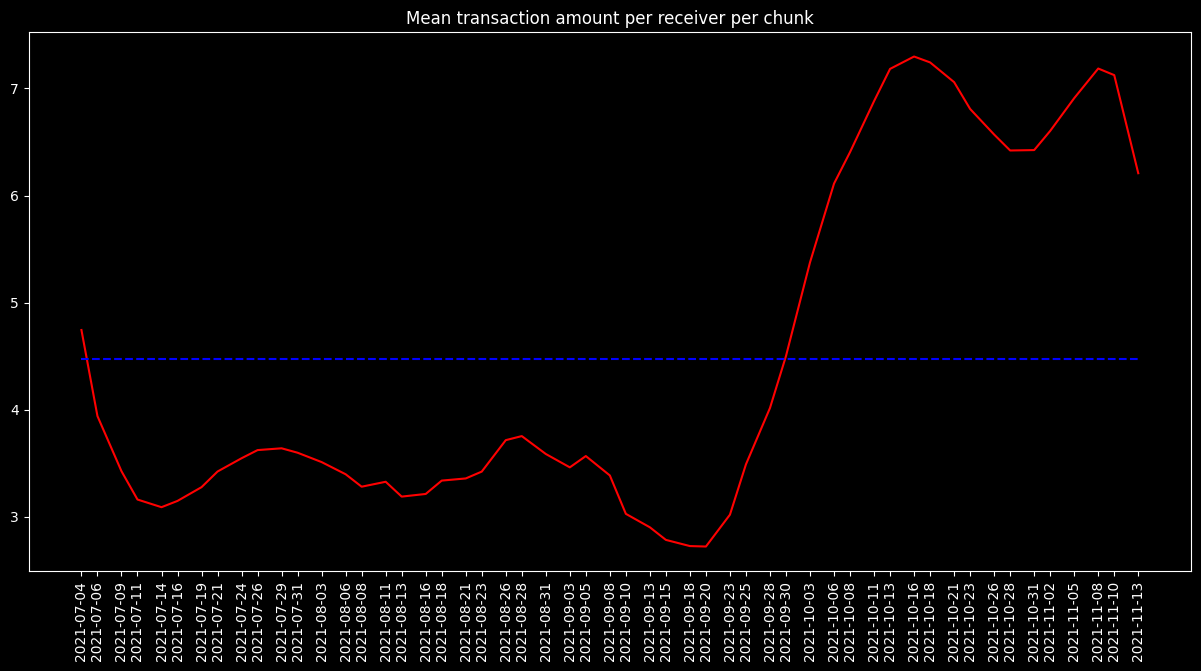

In [11]:
sb.lineplot(x = chunk_dates, y = np.array(mean_transaction_amount_per_receiver), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_transaction_amount_per_receiver))*np.ones(len(mean_transaction_amount_per_receiver)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean transaction amount per receiver per chunk')

Text(0.5, 1.0, 'Mean amount of unique receivers for sender per chunk')

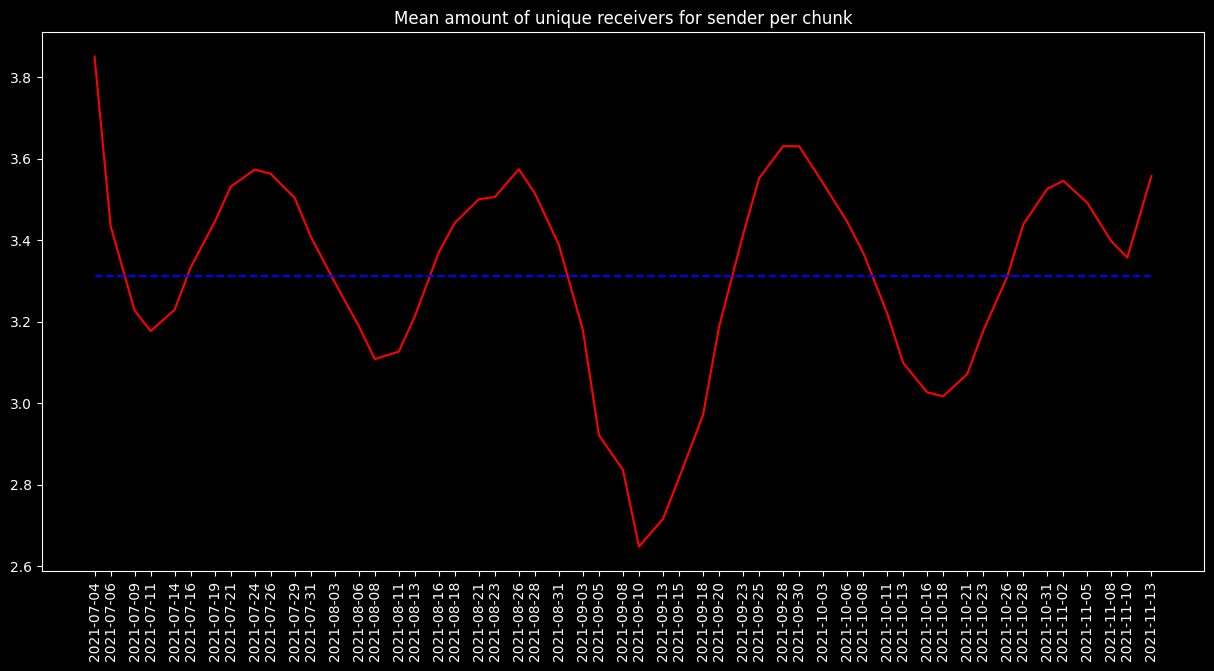

In [12]:
sb.lineplot(x = chunk_dates, y = np.array(mean_amount_of_unique_receiver_for_sender), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_amount_of_unique_receiver_for_sender))*np.ones(len(mean_amount_of_unique_receiver_for_sender)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean amount of unique receivers for sender per chunk')

Text(0.5, 1.0, 'Mean amount of unique sender for receiver per chunk')

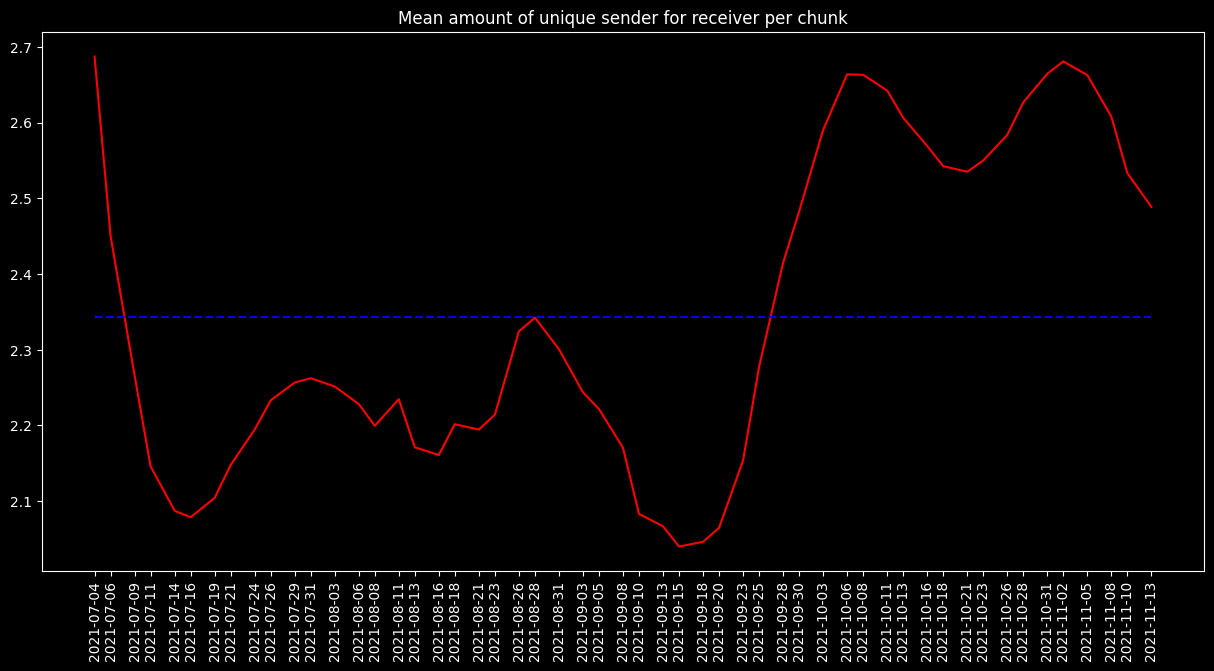

In [13]:
sb.lineplot(x = chunk_dates, y = np.array(mean_amount_of_unique_sender_for_receiver), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_amount_of_unique_sender_for_receiver))*np.ones(len(mean_amount_of_unique_sender_for_receiver)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean amount of unique sender for receiver per chunk')

Text(0.5, 1.0, 'Only sender accounts per chunk')

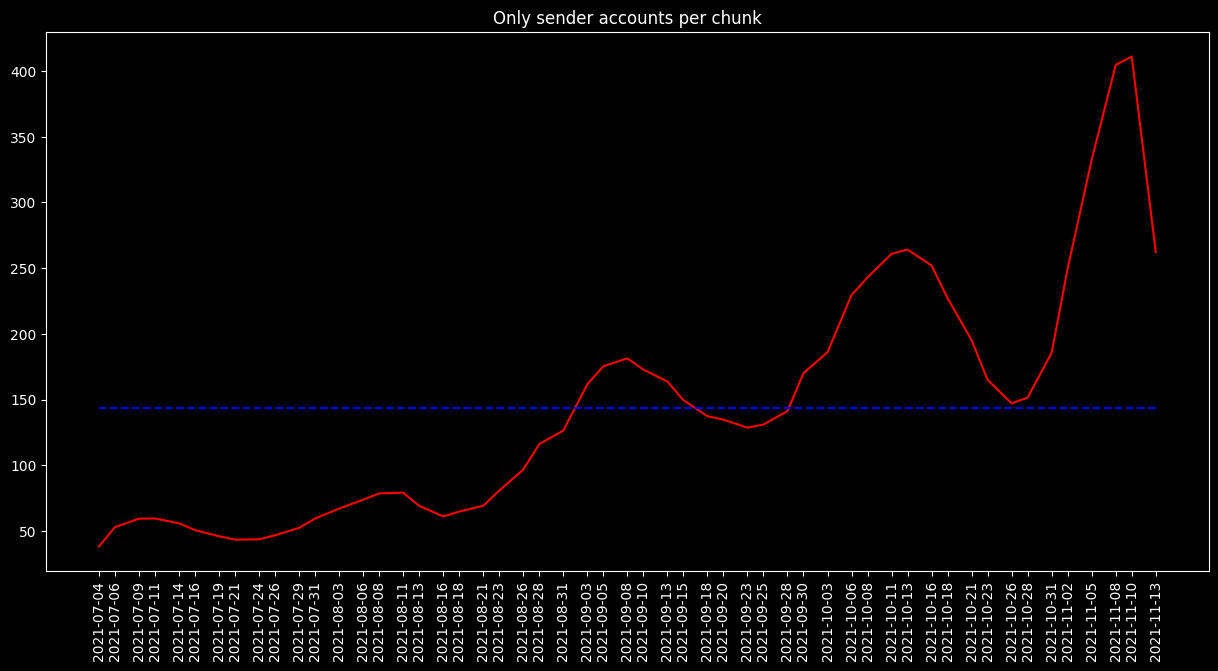

In [14]:
sb.lineplot(x = chunk_dates, y = np.array(only_sender_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(only_sender_accounts))*np.ones(len(only_sender_accounts)), color = 'blue', linestyle = 'dashed')

plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Only sender accounts per chunk')

Text(0.5, 1.0, 'Only receiver accounts per chunk')

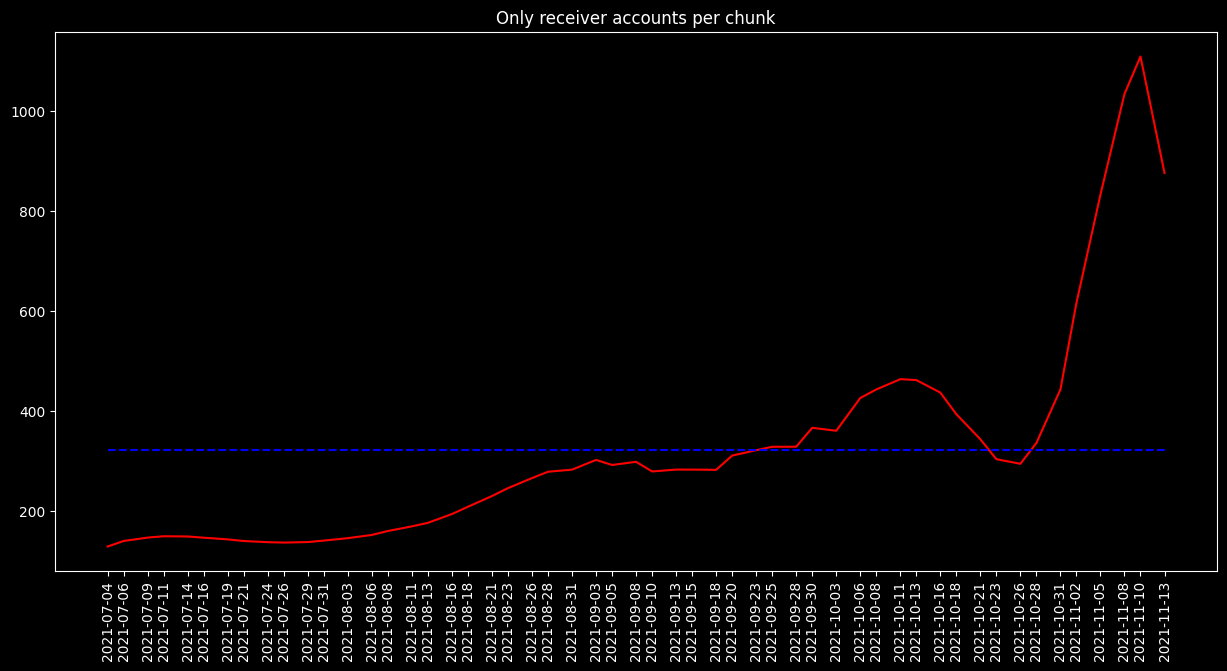

In [15]:
sb.lineplot(x = chunk_dates, y = np.array(only_receiver_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(only_receiver_accounts))*np.ones(len(only_receiver_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Only receiver accounts per chunk')

Text(0.5, 1.0, 'Percent of senders who are only senders per chunk')

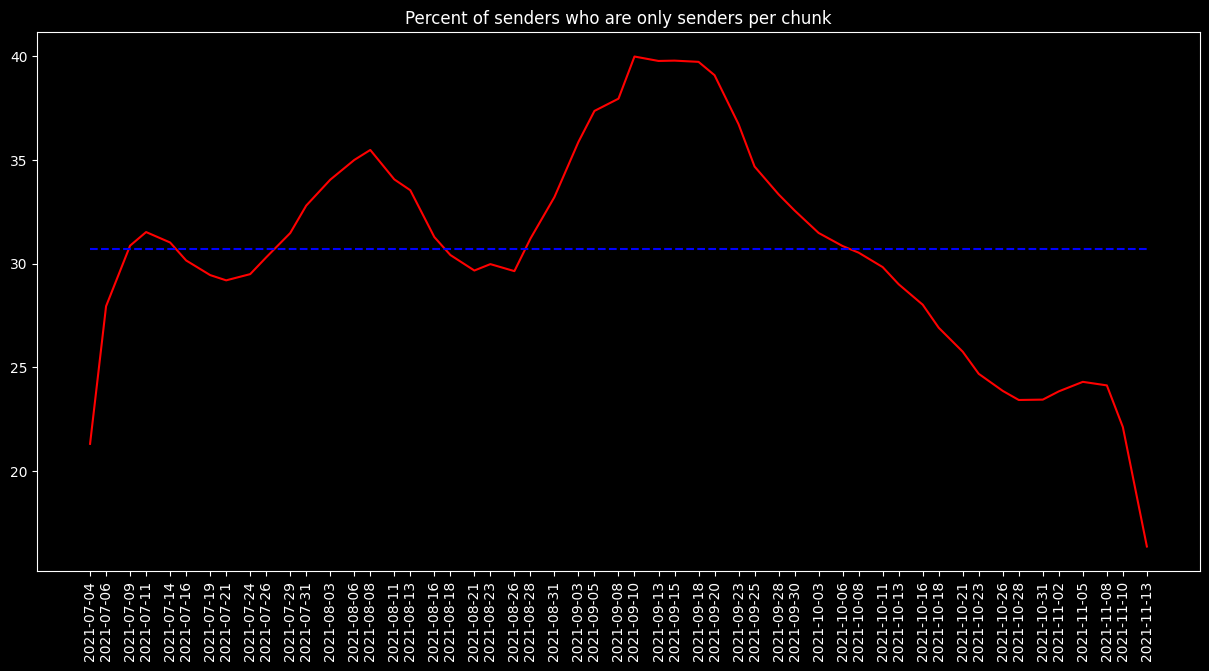

In [16]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_senders_only_senders), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_senders_only_senders))*np.ones(len(percent_of_senders_only_senders)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of senders who are only senders per chunk')

Text(0.5, 1.0, 'Percent of receivers who are only receivers per chunk')

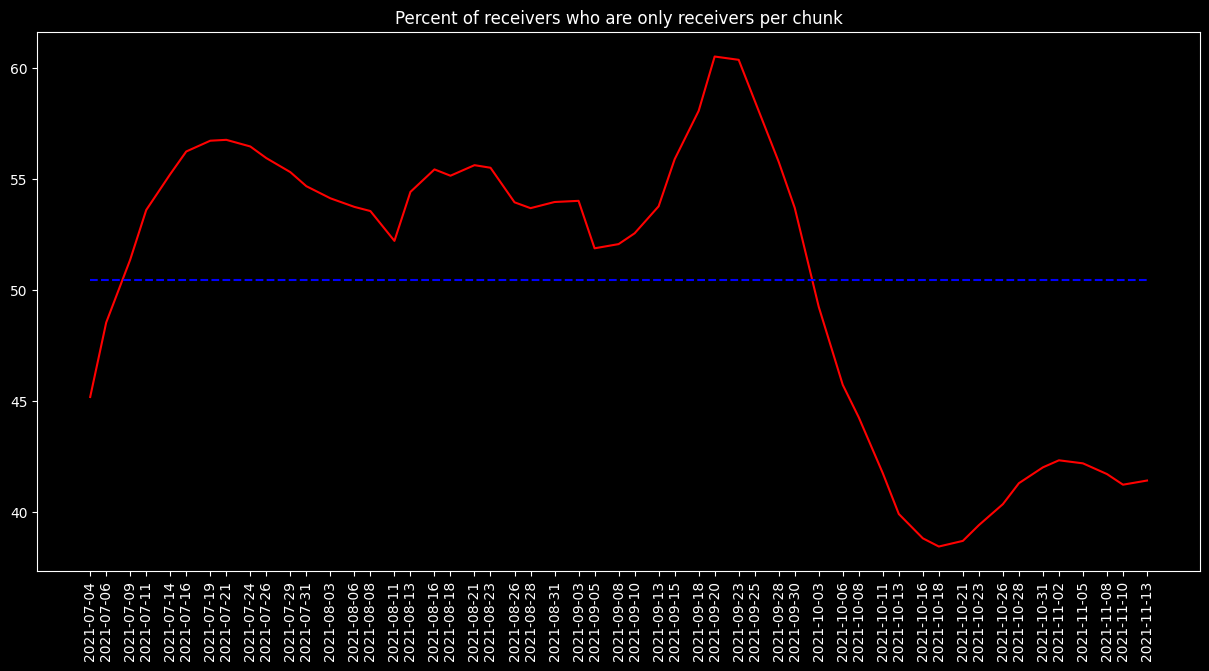

In [17]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_receivers_only_receivers), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_receivers_only_receivers))*np.ones(len(percent_of_receivers_only_receivers)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of receivers who are only receivers per chunk')

Text(0.5, 1.0, 'Percent of total accounts who are only senders per chunk')

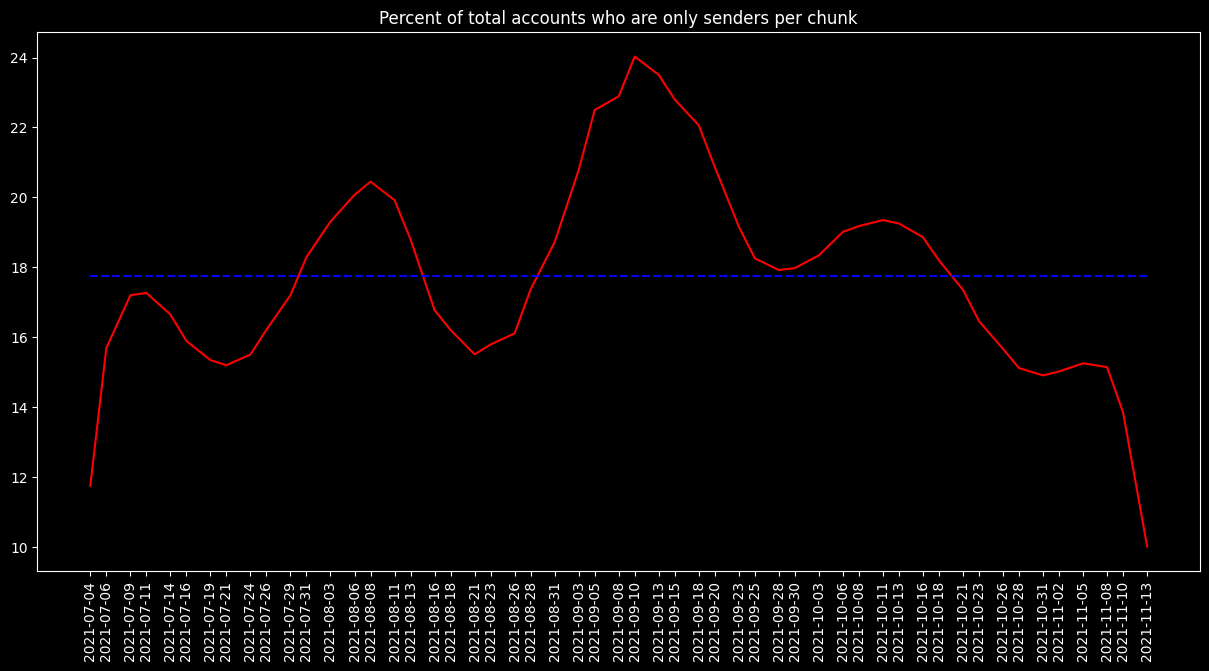

In [18]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_accounts_only_senders), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_accounts_only_senders))*np.ones(len(percent_of_accounts_only_senders)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of total accounts who are only senders per chunk')

Text(0.5, 1.0, 'Percent of total accounts who are only receivers per chunk')

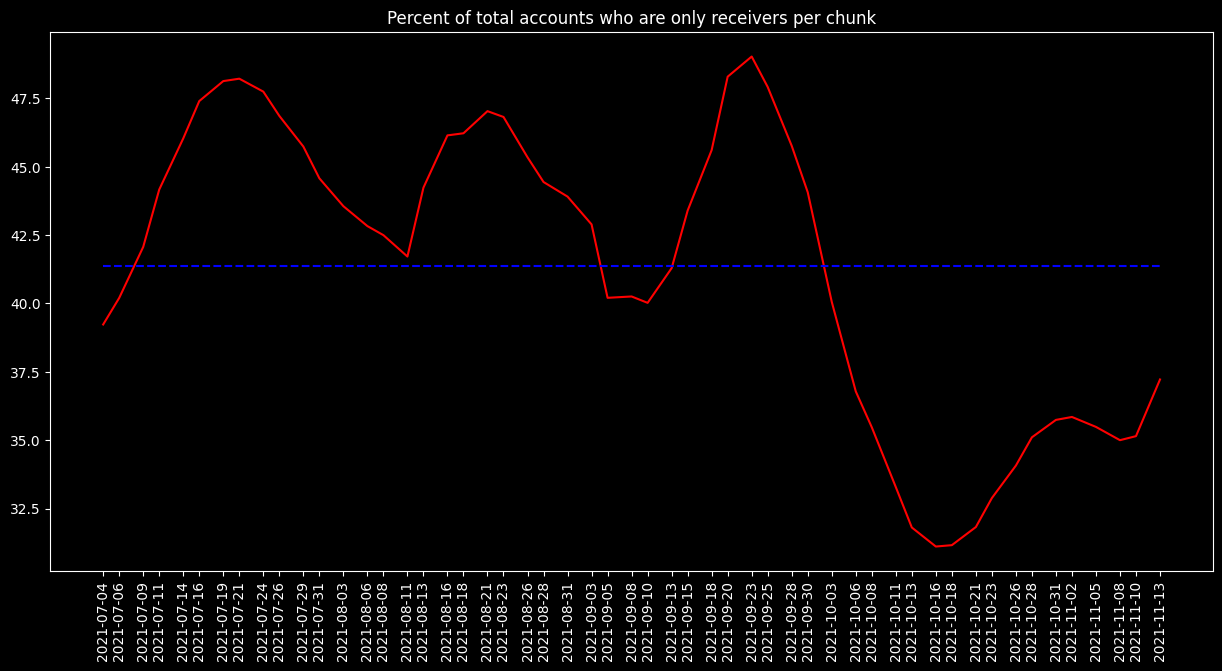

In [19]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_accounts_only_receivers), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_accounts_only_receivers))*np.ones(len(percent_of_accounts_only_receivers)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of total accounts who are only receivers per chunk')

Text(0.5, 1.0, 'Sender average transacted accounts per chunk')

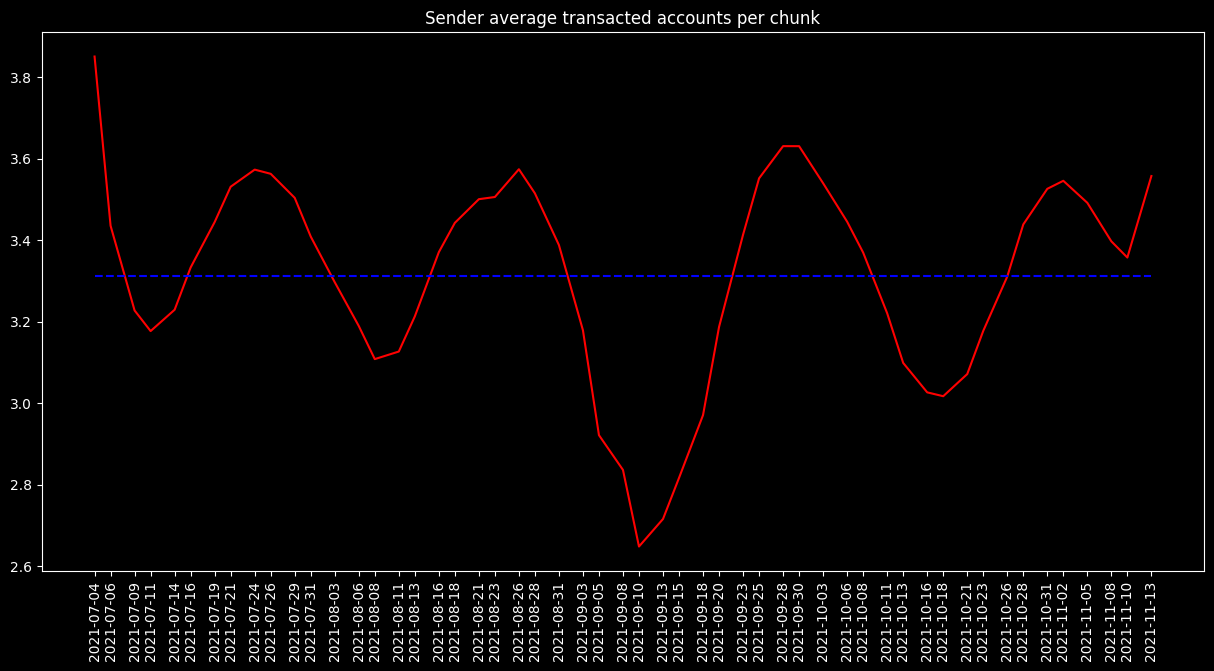

In [20]:
sb.lineplot(x = chunk_dates, y = np.array(sender_average_transacted_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(sender_average_transacted_accounts))*np.ones(len(sender_average_transacted_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Sender average transacted accounts per chunk')

Text(0.5, 1.0, 'Receiver average transacted accounts per chunk')

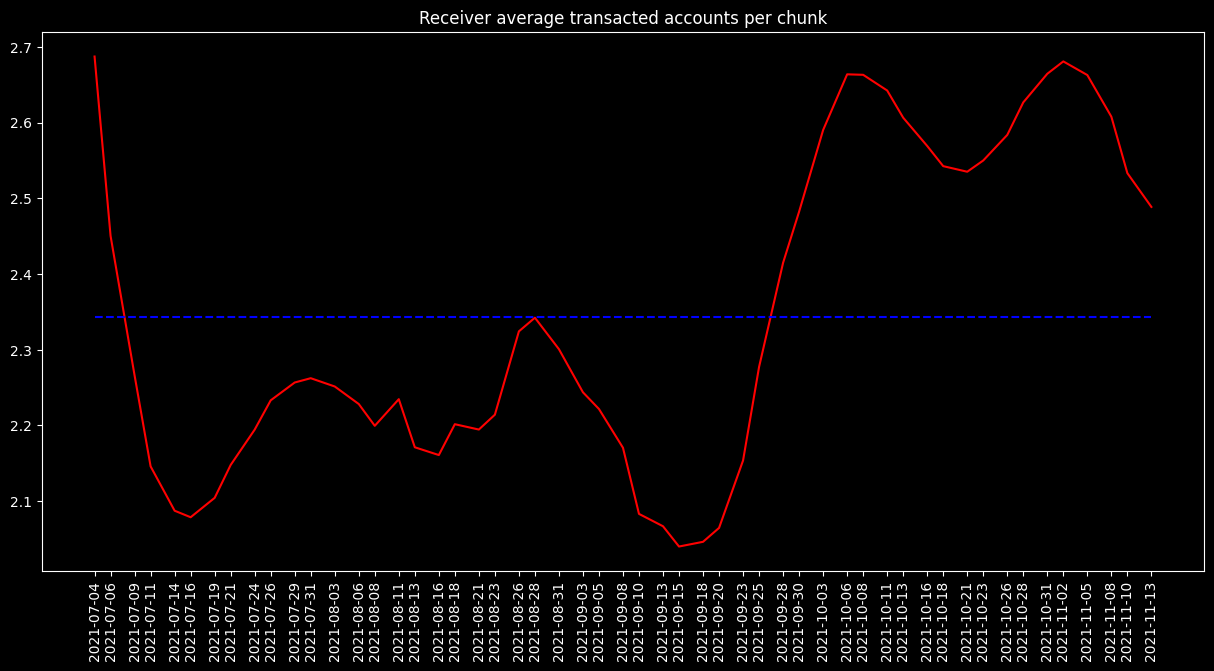

In [21]:
sb.lineplot(x = chunk_dates, y = np.array(receiver_average_transacted_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(receiver_average_transacted_accounts))*np.ones(len(receiver_average_transacted_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Receiver average transacted accounts per chunk')

Text(0.5, 1.0, 'Sender average transactions with same account per chunk')

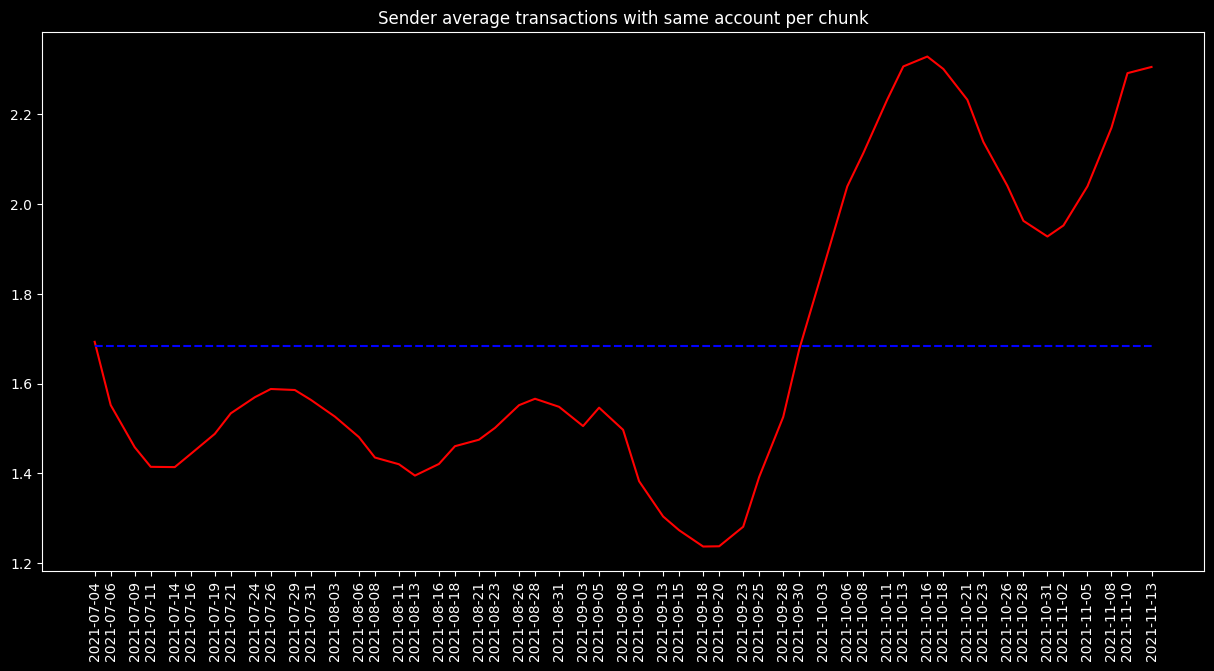

In [22]:
sb.lineplot(x = chunk_dates, y = np.array(sender_average_transacted_with_same_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(sender_average_transacted_with_same_accounts))*np.ones(len(sender_average_transacted_with_same_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Sender average transactions with same account per chunk')

Text(0.5, 1.0, 'Receiver average transactions with same account per chunk')

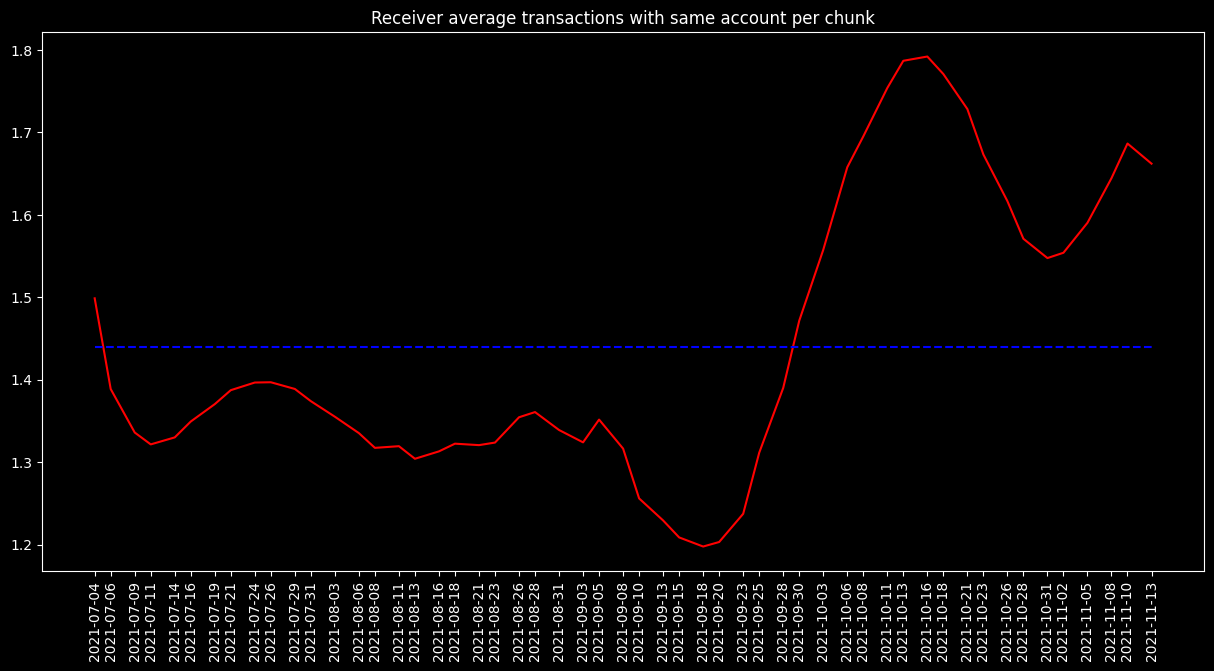

In [23]:
sb.lineplot(x = chunk_dates, y = np.array(receiver_average_transacted_with_same_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(receiver_average_transacted_with_same_accounts))*np.ones(len(receiver_average_transacted_with_same_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Receiver average transactions with same account per chunk')

Text(0.5, 1.0, 'One Algo transactions per chunk')

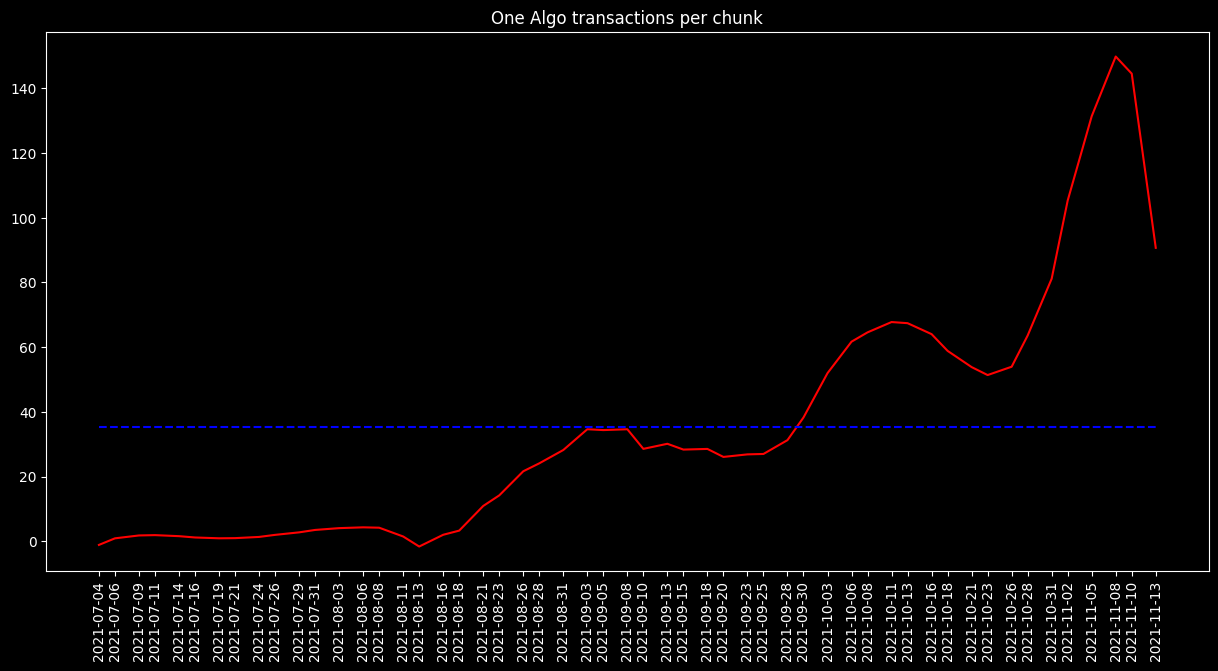

In [24]:
sb.lineplot(x = chunk_dates, y = np.array(transactions_one_algo), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(transactions_one_algo))*np.ones(len(transactions_one_algo)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('One Algo transactions per chunk')

C:\Users\juane\AppData\Local\Temp\ipykernel_4088\636266159.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\636266159.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\636266159.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\636266159.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\636266159.py:58: UserWarning: FixedFormatter should only be used together w

[Text(-10.0, 0, '2021-07-04'),
 Text(0.0, 0, '2021-07-06'),
 Text(10.0, 0, '2021-07-09'),
 Text(20.0, 0, '2021-07-11'),
 Text(30.0, 0, '2021-07-14'),
 Text(40.0, 0, '2021-07-16'),
 Text(50.0, 0, '2021-07-19'),
 Text(60.0, 0, '2021-07-21')]

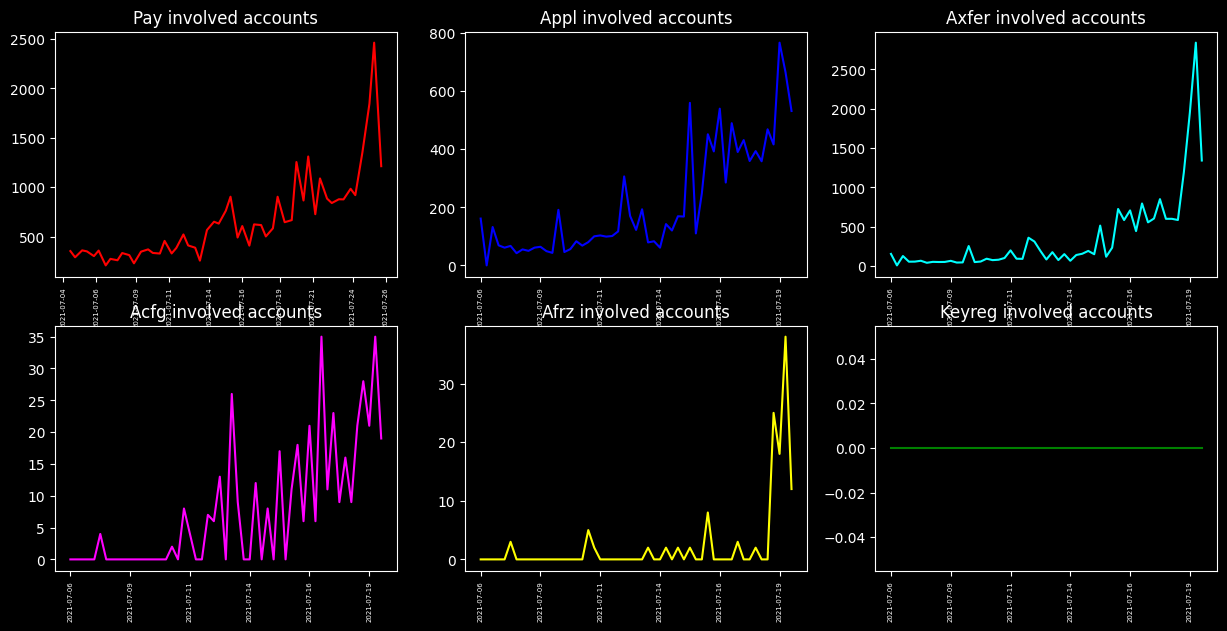

In [25]:
involved_accounts_per_type
pay_involved_accounts = []
appl_involved_accounts = []
axfer_involved_accounts = []
acfg_involved_accounts = []
keyreg_involved_accounts = []
afrz_involved_accounts = []

for i in range(len(involved_accounts_per_type)):
    if 'pay' in involved_accounts_per_type[i]:
        pay_involved_accounts.append(involved_accounts_per_type[i]['pay'])
    else:
        pay_involved_accounts.append(0)

    if 'appl' in involved_accounts_per_type[i]:
        appl_involved_accounts.append(involved_accounts_per_type[i]['appl'])
    else:
        appl_involved_accounts.append(0)
    if 'axfer' in involved_accounts_per_type[i]:
        axfer_involved_accounts.append(involved_accounts_per_type[i]['axfer'])
    else:
        axfer_involved_accounts.append(0)
    if 'acfg' in involved_accounts_per_type[i]:
        acfg_involved_accounts.append(involved_accounts_per_type[i]['acfg'])
    else:
        acfg_involved_accounts.append(0)
    if 'keyreg' in involved_accounts_per_type[i]:
        keyreg_involved_accounts.append(involved_accounts_per_type[i]['keyreg'])
    else:
        keyreg_involved_accounts.append(0)
    if 'afrz' in involved_accounts_per_type[i]:
        afrz_involved_accounts.append(involved_accounts_per_type[i]['afrz'])
    else:
        afrz_involved_accounts.append(0)
    

figure, axis = plt.subplots(2, 3)
# For Sine Function
axis[0, 0].plot(chunk_dates,pay_involved_accounts, color = 'red')
axis[0, 0].set_title("Pay involved accounts")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Cosine Function
axis[0, 1].plot(appl_involved_accounts, color = 'blue')
axis[0, 1].set_title("Appl involved accounts")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tangent Function
axis[0, 2].plot(axfer_involved_accounts, color = 'cyan')
axis[0, 2].set_title("Axfer involved accounts")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tanh Function
axis[1, 0].plot(acfg_involved_accounts, color = 'magenta')
axis[1, 0].set_title("Acfg involved accounts")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tangent Function
axis[1, 1].plot(afrz_involved_accounts, color = 'yellow')
axis[1, 1].set_title("Afrz involved accounts")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tanh Function
axis[1, 2].plot(keyreg_involved_accounts, color = 'green')
axis[1, 2].set_title("Keyreg involved accounts")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

C:\Users\juane\AppData\Local\Temp\ipykernel_4088\2571128979.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\2571128979.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\2571128979.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\2571128979.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\2571128979.py:62: UserWarning: FixedFormatter should only be used toget

[Text(-10.0, 0, '2021-07-04'),
 Text(0.0, 0, '2021-07-06'),
 Text(10.0, 0, '2021-07-09'),
 Text(20.0, 0, '2021-07-11'),
 Text(30.0, 0, '2021-07-14'),
 Text(40.0, 0, '2021-07-16'),
 Text(50.0, 0, '2021-07-19'),
 Text(60.0, 0, '2021-07-21')]

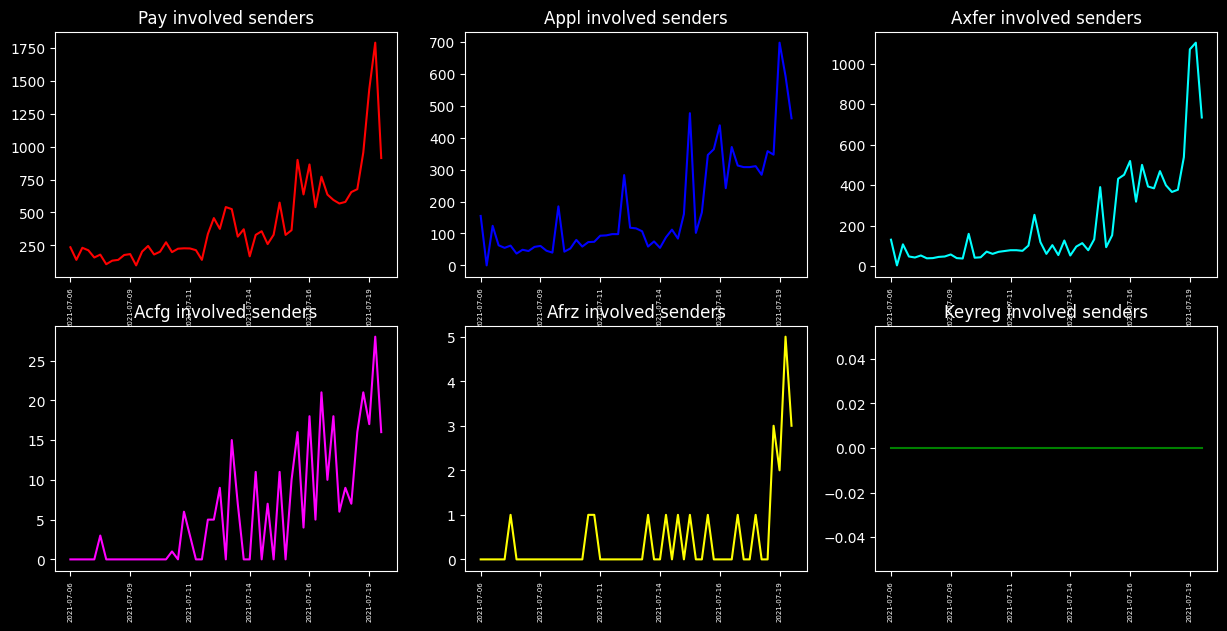

In [26]:
involved_senders_per_type
pay_involved_senders = []
appl_involved_senders = []
axfer_involved_senders = []
acfg_involved_senders = []
keyreg_involved_senders = []
afrz_involved_senders = []

for i in range(len(involved_senders_per_type)):
    if 'pay' in involved_senders_per_type[i]:
        pay_involved_senders.append(involved_senders_per_type[i]['pay'])
    else:
        pay_involved_senders.append(0)

    if 'appl' in involved_senders_per_type[i]:
        appl_involved_senders.append(involved_senders_per_type[i]['appl'])
    else:
        appl_involved_senders.append(0)
    if 'axfer' in involved_senders_per_type[i]:
        axfer_involved_senders.append(involved_senders_per_type[i]['axfer'])
    else:
        axfer_involved_senders.append(0)
    if 'acfg' in involved_senders_per_type[i]:
        acfg_involved_senders.append(involved_senders_per_type[i]['acfg'])
    else:
        acfg_involved_senders.append(0)
    if 'keyreg' in involved_senders_per_type[i]:
        keyreg_involved_senders.append(involved_senders_per_type[i]['keyreg'])
    else:
        keyreg_involved_senders.append(0)
    if 'afrz' in involved_senders_per_type[i]:
        afrz_involved_senders.append(involved_senders_per_type[i]['afrz'])
    else:
        afrz_involved_senders.append(0)


figure, axis = plt.subplots(2, 3)


axis[0, 0].plot(pay_involved_senders, color = 'red')
axis[0, 0].set_title("Pay involved senders")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[0, 1].plot(appl_involved_senders, color = 'blue')
axis[0, 1].set_title("Appl involved senders")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[0, 2].plot(axfer_involved_senders, color = 'cyan')
axis[0, 2].set_title("Axfer involved senders")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[1, 0].plot(acfg_involved_senders, color = 'magenta')
axis[1, 0].set_title("Acfg involved senders")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[1, 1].plot(afrz_involved_senders, color = 'yellow')
axis[1, 1].set_title("Afrz involved senders")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[1, 2].plot(keyreg_involved_senders, color = 'green')
axis[1, 2].set_title("Keyreg involved senders")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')



C:\Users\juane\AppData\Local\Temp\ipykernel_4088\1996834235.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\1996834235.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\1996834235.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\1996834235.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\1996834235.py:57: UserWarning: FixedFormatter should only be used toget

[Text(-10.0, 0, '2021-07-04'),
 Text(0.0, 0, '2021-07-06'),
 Text(10.0, 0, '2021-07-09'),
 Text(20.0, 0, '2021-07-11'),
 Text(30.0, 0, '2021-07-14'),
 Text(40.0, 0, '2021-07-16'),
 Text(50.0, 0, '2021-07-19'),
 Text(60.0, 0, '2021-07-21')]

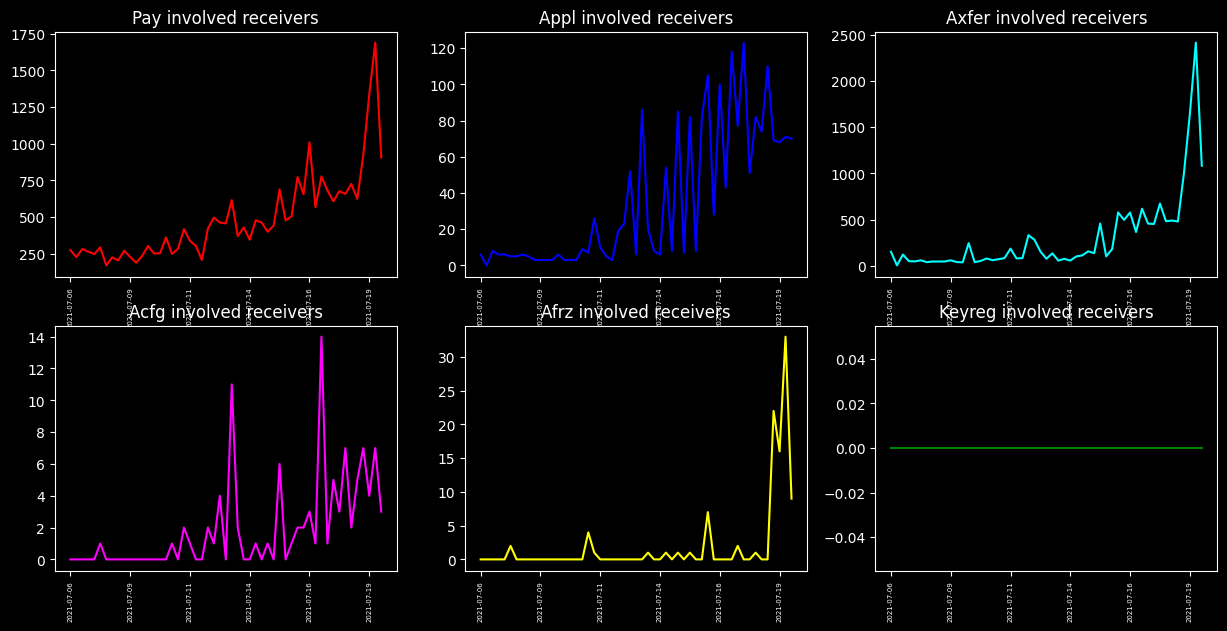

In [27]:
involved_receivers_per_type
pay_involved_receivers = []
appl_involved_receivers = []
axfer_involved_receivers = []
acfg_involved_receivers = []
keyreg_involved_receivers = []
afrz_involved_receivers = []

for i in range(len(involved_receivers_per_type)):
    if 'pay' in involved_receivers_per_type[i]:
        pay_involved_receivers.append(involved_receivers_per_type[i]['pay'])
    else:
        pay_involved_receivers.append(0)

    if 'appl' in involved_receivers_per_type[i]:
        appl_involved_receivers.append(involved_receivers_per_type[i]['appl'])
    else:
        appl_involved_receivers.append(0)
    if 'axfer' in involved_receivers_per_type[i]:
        axfer_involved_receivers.append(involved_receivers_per_type[i]['axfer'])
    else:
        axfer_involved_receivers.append(0)
    if 'acfg' in involved_receivers_per_type[i]:
        acfg_involved_receivers.append(involved_receivers_per_type[i]['acfg'])
    else:
        acfg_involved_receivers.append(0)
    if 'keyreg' in involved_receivers_per_type[i]:
        keyreg_involved_receivers.append(involved_receivers_per_type[i]['keyreg'])
    else:
        keyreg_involved_receivers.append(0)
    if 'afrz' in involved_receivers_per_type[i]:
        afrz_involved_receivers.append(involved_receivers_per_type[i]['afrz'])
    else:
        afrz_involved_receivers.append(0)
    

figure, axis = plt.subplots(2, 3)

axis[0, 0].plot(pay_involved_receivers, color = 'red')
axis[0, 0].set_title("Pay involved receivers")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[0, 1].plot(appl_involved_receivers, color = 'blue')
axis[0, 1].set_title("Appl involved receivers")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[0, 2].plot(axfer_involved_receivers, color = 'cyan')
axis[0, 2].set_title("Axfer involved receivers")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[1, 0].plot(acfg_involved_receivers, color = 'magenta')
axis[1, 0].set_title("Acfg involved receivers")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[1, 1].plot(afrz_involved_receivers, color = 'yellow')
axis[1, 1].set_title("Afrz involved receivers")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[1, 2].plot(keyreg_involved_receivers, color = 'green')
axis[1, 2].set_title("Keyreg involved receivers")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')



C:\Users\juane\AppData\Local\Temp\ipykernel_4088\3220216217.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\3220216217.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\3220216217.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\3220216217.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_4088\3220216217.py:60: UserWarning: FixedFormatter should only be used toget

[Text(-10.0, 0, '2021-07-04'),
 Text(0.0, 0, '2021-07-06'),
 Text(10.0, 0, '2021-07-09'),
 Text(20.0, 0, '2021-07-11'),
 Text(30.0, 0, '2021-07-14'),
 Text(40.0, 0, '2021-07-16'),
 Text(50.0, 0, '2021-07-19'),
 Text(60.0, 0, '2021-07-21')]

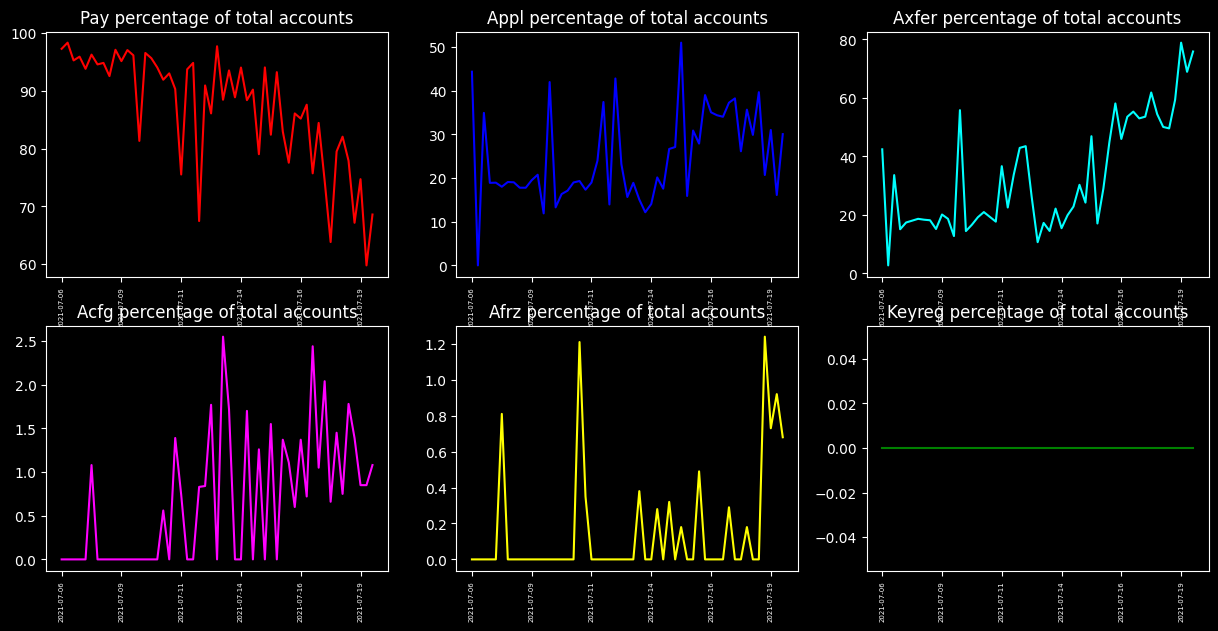

In [28]:
percentage_of_total_accounts_per_type
pay_percentage_of_total_accounts = []
appl_percentage_of_total_accounts = []
axfer_percentage_of_total_accounts = []
acfg_percentage_of_total_accounts = []
keyreg_percentage_of_total_accounts = []
afrz_percentage_of_total_accounts = []

for i in range(len(percentage_of_total_accounts_per_type)):
    if 'pay' in percentage_of_total_accounts_per_type[i]:
        pay_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['pay'])
    else:
        pay_percentage_of_total_accounts.append(0)

    if 'appl' in percentage_of_total_accounts_per_type[i]:
        appl_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['appl'])
    else:
        appl_percentage_of_total_accounts.append(0)
    if 'axfer' in percentage_of_total_accounts_per_type[i]:
        axfer_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['axfer'])
    else:
        axfer_percentage_of_total_accounts.append(0)
    if 'acfg' in percentage_of_total_accounts_per_type[i]:
        acfg_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['acfg'])
    else:
        acfg_percentage_of_total_accounts.append(0)
    if 'keyreg' in percentage_of_total_accounts_per_type[i]:
        keyreg_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['keyreg'])
    else:
        keyreg_percentage_of_total_accounts.append(0)
    if 'afrz' in percentage_of_total_accounts_per_type[i]:
        afrz_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['afrz'])
    else:
        afrz_percentage_of_total_accounts.append(0)

figure, axis = plt.subplots(2, 3)
# For Sine Function
axis[0, 0].plot(pay_percentage_of_total_accounts, color = 'red')
axis[0, 0].set_title("Pay percentage of total accounts")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Cosine Function
axis[0, 1].plot(appl_percentage_of_total_accounts, color = 'blue')
axis[0, 1].set_title("Appl percentage of total accounts")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tangent Function
axis[0, 2].plot(axfer_percentage_of_total_accounts, color = 'cyan')
axis[0, 2].set_title("Axfer percentage of total accounts")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tanh Function
axis[1, 0].plot(acfg_percentage_of_total_accounts, color = 'magenta')
axis[1, 0].set_title("Acfg percentage of total accounts")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tangent Function
axis[1, 1].plot(afrz_percentage_of_total_accounts, color = 'yellow')
axis[1, 1].set_title("Afrz percentage of total accounts")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tanh Function
axis[1, 2].plot(keyreg_percentage_of_total_accounts, color = 'green')
axis[1, 2].set_title("Keyreg percentage of total accounts")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')



Text(0.5, 1.0, 'Amount of pay transactions per chunk')

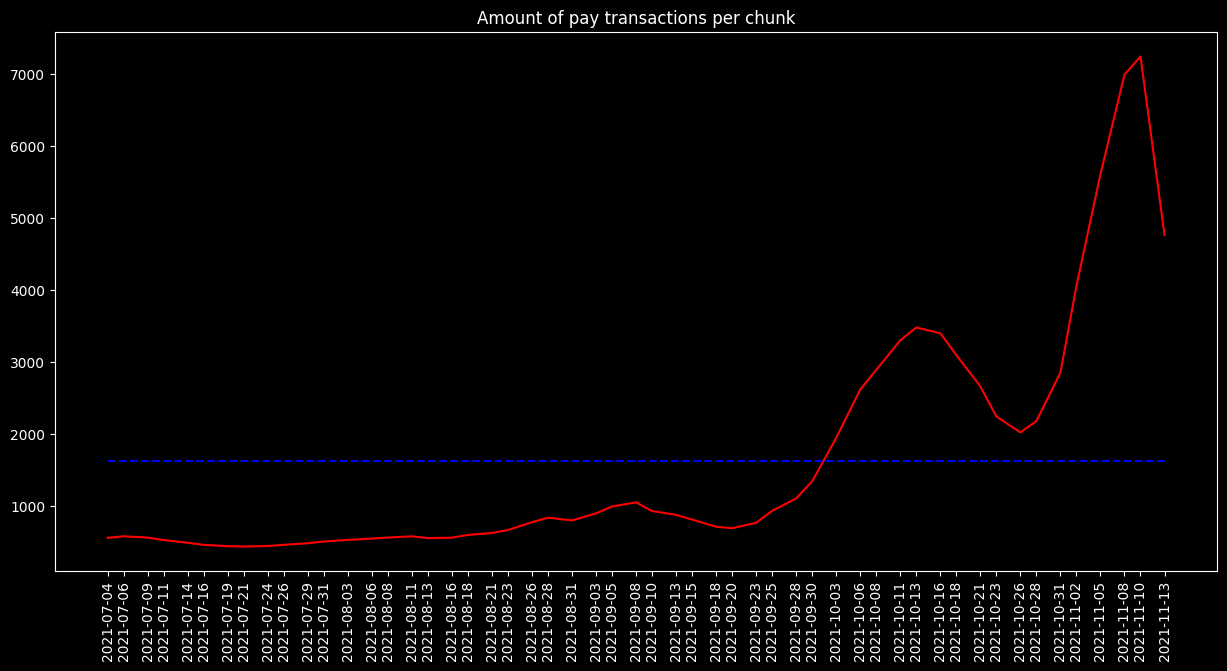

In [29]:
sb.lineplot(x = chunk_dates , y = np.array(transaction_amount_in_microalgo), color = 'red')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(transaction_amount_in_microalgo))*np.ones(len(transaction_amount_in_microalgo)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Amount of pay transactions per chunk')

Text(0.5, 1.0, 'Mean amount of algo sent per chunk')

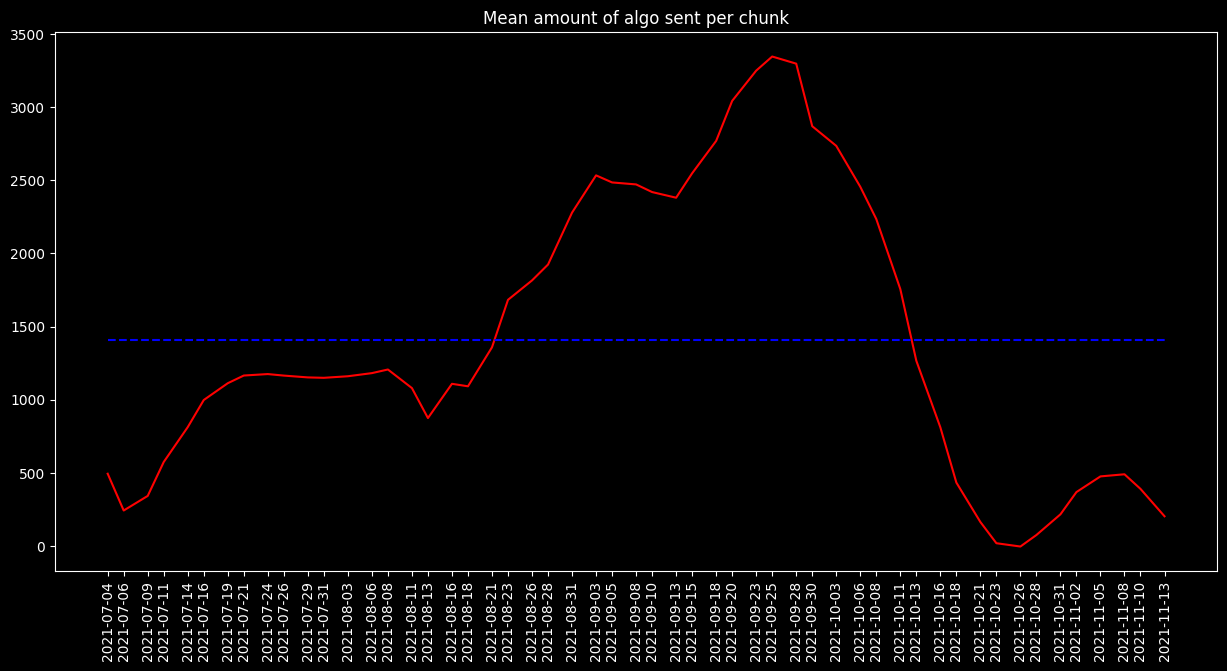

In [30]:
sb.lineplot(x = chunk_dates , y = np.array(mean_amount_of_algo_sent), color = 'red')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(mean_amount_of_algo_sent))*np.ones(len(mean_amount_of_algo_sent)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
# plt.ylim(0,20000)
plt.title('Mean amount of algo sent per chunk')

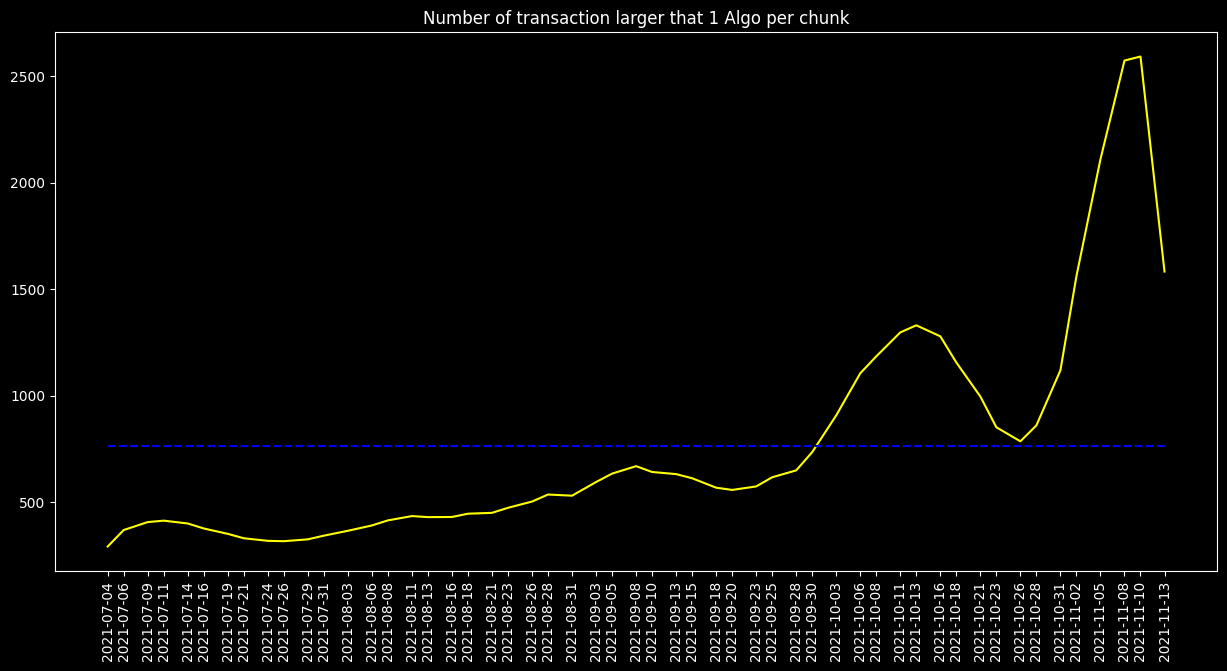

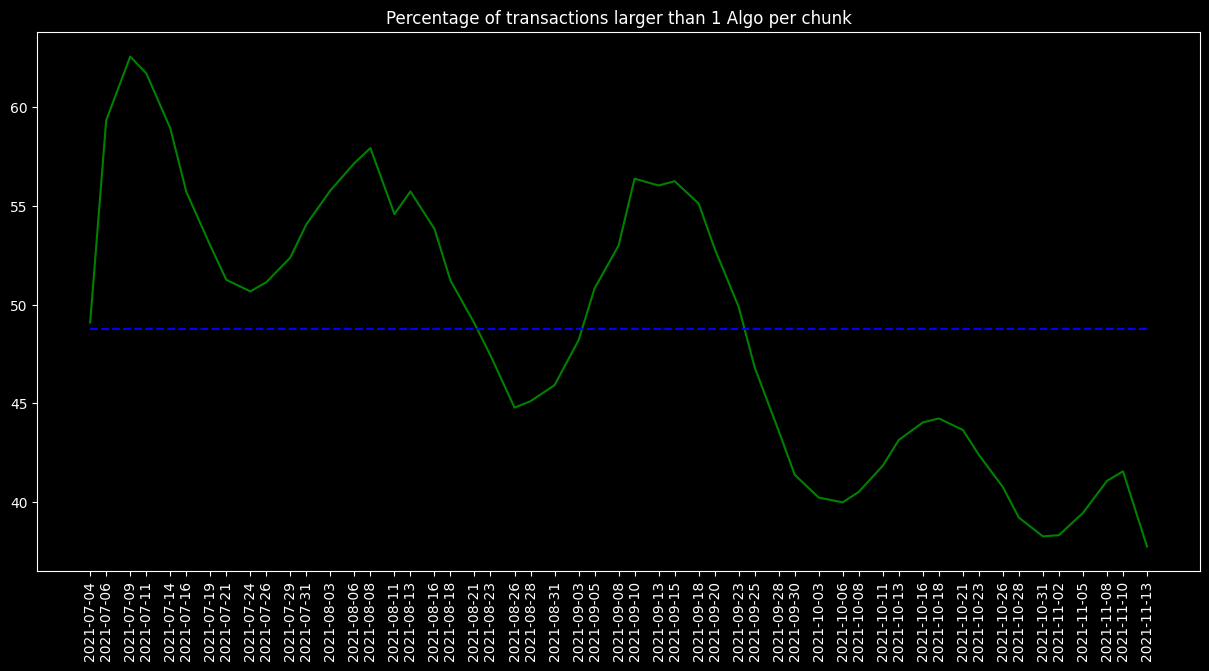

In [31]:
sb.lineplot(x = chunk_dates , y = np.array(more_than_one_algo), color = 'yellow')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(more_than_one_algo))*np.ones(len(more_than_one_algo)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Number of transaction larger that 1 Algo per chunk')
plt.show()

sb.lineplot(x = chunk_dates , y = np.array(more_than_one_algo_percentage), color = 'green')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(more_than_one_algo_percentage))*np.ones(len(more_than_one_algo_percentage)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percentage of transactions larger than 1 Algo per chunk')
plt.show()

53
53


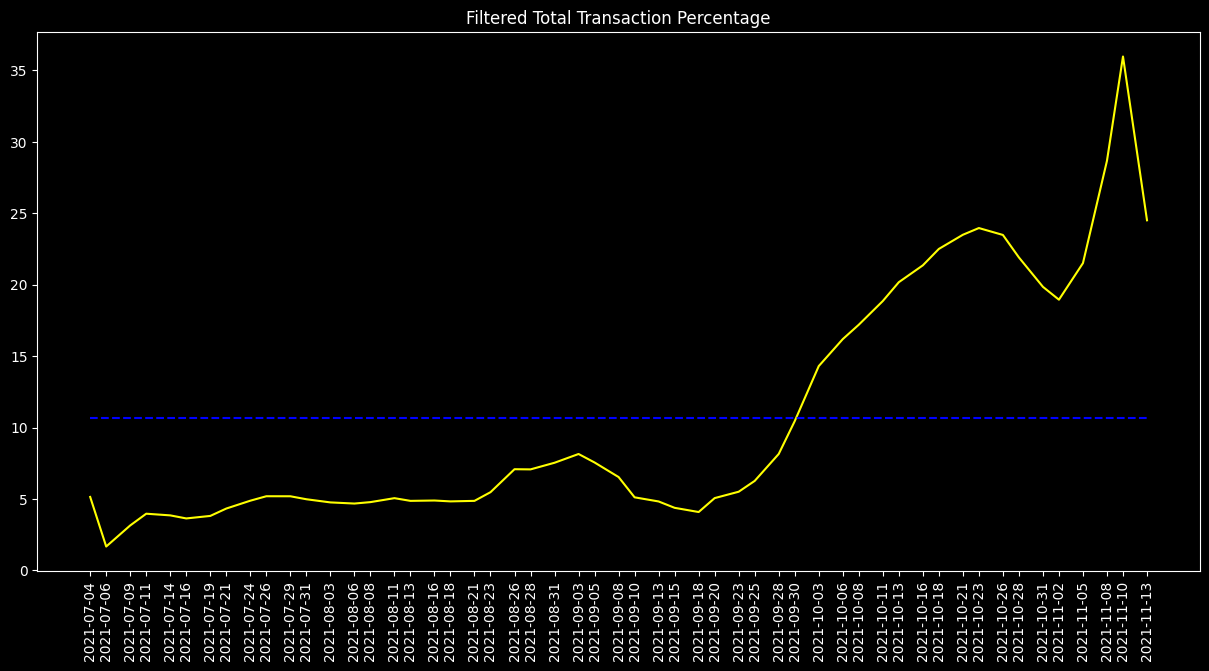

In [36]:
print(len(chunk_dates))
print(len(filtered_total_transaction_percentage))
filtered_total_transaction_percentage_smoothed = savgol_filter(filtered_total_transaction_percentage,30,11)
sb.lineplot(x = chunk_dates , y = np.array(filtered_total_transaction_percentage_smoothed), color = 'yellow')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(filtered_total_transaction_percentage_smoothed))*np.ones(len(filtered_total_transaction_percentage_smoothed)), color = 'blue', linestyle = 'dashed')

plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Filtered Total Transaction Percentage')
plt.show()

In [33]:
# importante = np.array(filtered_total_transaction_percentage[30:])
# linea = np.ones(31)*np.mean(importante)
# np.mean(importante)
# sb.lineplot(importante, color = 'yellow')
# sb.lineplot(linea, color = 'red' )
# plt.xticks(np.arange(0,31, step = 1))
# plt.yticks(np.arange(0,15,step = 1))
# plt.title('Filtered Total Transaction Percentage')
# plt.show()

53


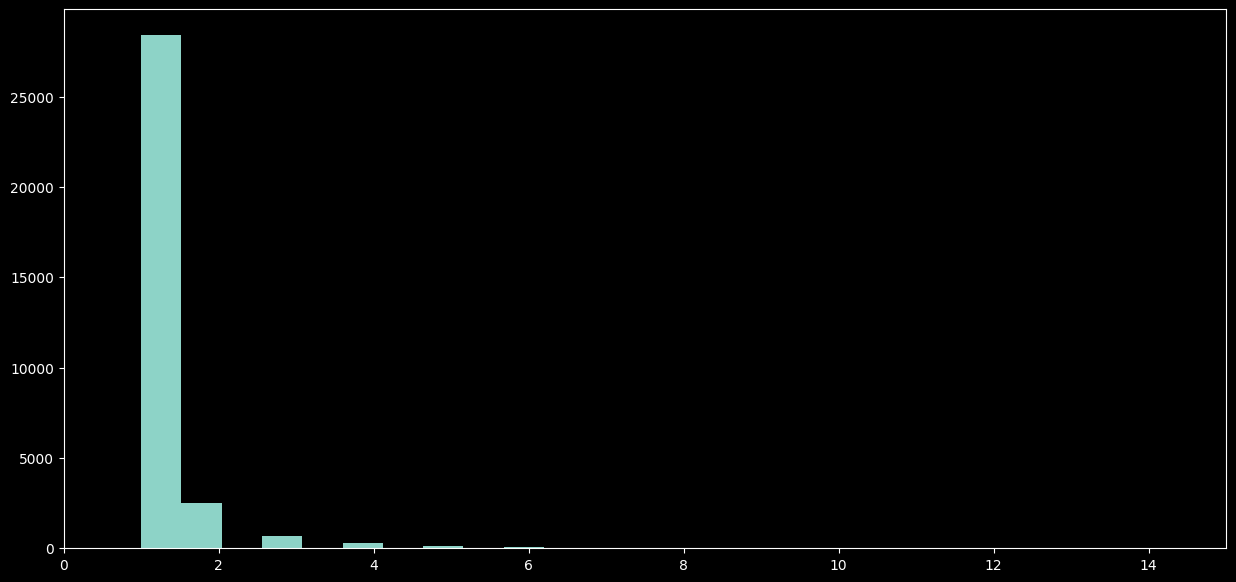

In [34]:
plt.hist(total_activity, bins = 100)
plt.xlim(0,15)
# plt.ylim(0,1000)
print(np.max(np.array(total_activity)))

In [35]:
# sb.lineplot(x = chunk_dates , y = np.array(average_path_length), color = 'yellow')
# sb.lineplot(x = chunk_dates , y = np.mean(np.array(average_path_length))*np.ones(61), color = 'blue', linestyle = 'dashed')
# plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
# # plt.yticks(np.arange(0,10,step = 2))
# plt.title('Average Path Length')
# plt.show()